# This assignment provides hands-on data wrangling and classification experience
For this assignment, you are a Machine Learning Engineer at a local bank, and your task is to analyze whether loan applicants qualify, based on their personal information.
Tasks are:
I. Data wrangling to perform one-hot-encoding for the data and normalization
II. Eliminating unimportant features
III. Performing classification to predict qualification for loan in future.

### Import the necessary modules

In [26]:
import os
import tensorflow as tf
#from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Load the training data. Print out its shape and first few rows.

In [27]:
url = "https://raw.githubusercontent.com/FourthBrain/2.-Classification/main/bank-full.csv?token=ARJV76TWTYENKFZKXB4CUYS7SIDOM"
df_train = pd.read_csv(url, sep=';')
print(np.shape(df_train))
df_train.head()


(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Exercise: Perform Exploratory Data Analysis on each feature

In [28]:
### START CODE HERE ###
# Get the info (column number and name, non-null count, and dtype) for each column in the training df
df_train.info()
#df_train.dtypes
# Get summary statistics for the training df with the describe() method
df_train.describe()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Exercise: Visualize the distributions of each numeric feature

In [29]:
# Extracting list of column names w/dtypes == int64
col_list = list(df_train.select_dtypes(include=['int64']).columns)
print(col_list)
df_train['age']

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [30]:
# Same extraction using list comprehension
# ... not sure so will use what I have

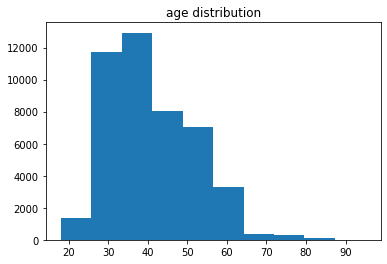

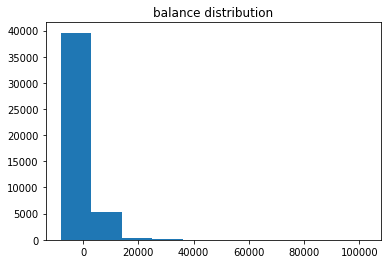

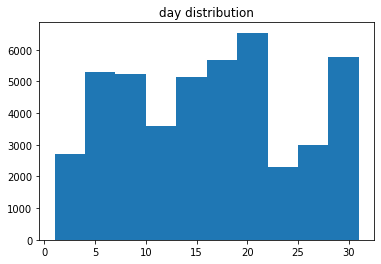

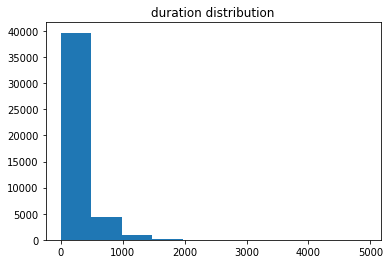

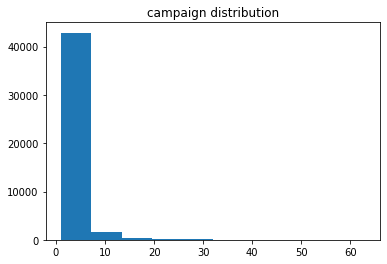

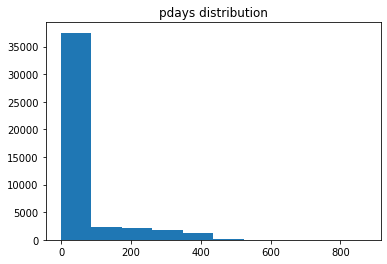

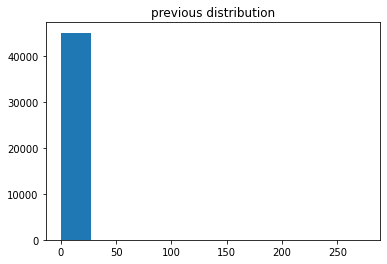

In [31]:
### START CODE HERE ###
# Use a list comprehension to extract the names of the numeric columns of the training df 
# (those with an integer dtype)
numeric_columns = list(df_train.select_dtypes(include=['int64']).columns)
# Loop through the numeric columns
for col in numeric_columns:
    # Generate a histogram of the current numeric feature column
    plt.hist(df_train[col]);
    plt.title(f'{col} distribution')
    plt.show()
### END CODE HERE ###

### Exercise: Inspect the unique values of the non-numeric columns, and their counts

In [32]:
# Understanding the non_numeric column data
non_numeric_columns = list(df_train.select_dtypes(include=['object']).columns)
print(non_numeric_columns)
print(df_train[non_numeric_columns])

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
                job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   c

In [33]:
# Printing counts of each unique  value in  thecurrent column
# Test with a single column
test_col= df_train['job']
print(test_col.value_counts())


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


In [34]:
### START CODE HERE ###
# Use a list comprehension to list the names of the non-numeric columns in the training df
# (those with an object dtype)
non_numeric_columns = list(df_train.select_dtypes(include=['object']).columns)
# Loop through the non-numeric columns
for col in non_numeric_columns:
    # Print the counts of each unique value in the current column
    print(f'Unique Value Counts For Column:  {col}')
    print(df_train[col].value_counts())
    print('\n')
### END CODE HERE ###

Unique Value Counts For Column:  job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Unique Value Counts For Column:  marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Unique Value Counts For Column:  education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Unique Value Counts For Column:  default
no     44396
yes      815
Name: default, dtype: int64


Unique Value Counts For Column:  housing
yes    25130
no     20081
Name: housing, dtype: int64


Unique Value Counts For Column:  loan
no     37967
yes     7244
Name: loan, dtype: int64


Unique Value Counts For Column:  contact
cellular     29285
unknown      13020
telephone     2906
Name: contact,

### Exercise: Some columns are 'yes'/'no' binaries. Map them to integer binaries.

In [40]:
### START CODE HERE ###
# Make a list of the binary columns. There should be 4 of them.
# Looking over data, binary columns are ['default',  'housing', 'loan', 'y']
# Find their names in the output of the previous exercise.
binary_columns = ['default',  'housing', 'loan', 'y']
# Create a dictionary in which the keys map to the values
# Remember, we want to replace 'no' and 'yes' with the appropriate integers
binary_mapping = {'yes' : 1, 'no' :  0}
# Map the binary columns
for col in binary_columns:
    # Apply the mapping to the current column with the map() method for Pandas Series
    df_train[col] = df_train[col].map(binary_mapping)
### END CODE HERE ###

In [41]:
# Verify that mapping worked 
print(df_train[binary_columns])

       default  housing  loan  y
0            0        1     0  0
1            0        1     0  0
2            0        1     1  0
3            0        1     0  0
4            0        0     0  0
...        ...      ...   ... ..
45206        0        0     0  1
45207        0        0     0  1
45208        0        0     0  1
45209        0        0     0  0
45210        0        0     0  0

[45211 rows x 4 columns]


### Exericse: Map the months from strings to integers, with 1 corresponding to January, etc.

In [42]:
### START CODE HERE ###
# Create the mapping dictionary
# Make sure the months' names are formatted properly
month_mapping = {'jan' : 1,
                 'feb' : 2,
                 'mar' : 3,
                 'apr' : 4,
                 'may' : 5,
                 'jun' : 6,
                 'jul' : 7,
                 'aug' : 8,
                 'sep' : 9,
                 'oct' : 10,
                 'nov' : 11,
                 'dec' : 12,
                 }
# Map the months
df_train['month'] = df_train['month'].map(month_mapping)
### END CODE HERE ###

In [43]:
# Verify that mapping worked
print(df_train['month'])

0         5
1         5
2         5
3         5
4         5
         ..
45206    11
45207    11
45208    11
45209    11
45210    11
Name: month, Length: 45211, dtype: int64


### Exercise: One-hot encode the remaining categorical features

In [44]:
df_train_test = df_train

In [45]:
# Testing get_dummies() function
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
out = pd.get_dummies(df_train_test,  columns=categorical_columns)
out.head()
# ^ Looks about right

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


In [46]:
### START CODE HERE ###
# List the categorical features. There should be 5 of them.
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
df_train = pd.get_dummies(df_train,  columns=categorical_columns)
### END CODE HERE ###

### Inspect the first few rows of our preprocessed DataFrame

In [47]:
df_train.head()

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


### Exercise: Extract the target values from the training DataFrame

In [48]:
### START CODE HERE ###
# Extract the target values from the training DataFrame
y = df_train['y']
# Drop the target column from the training DataFrame
df_train = df_train.drop(columns='y')
### END CODE HERE ###

### Exercise: Inspect how balanced y is

For a balanced binary target, approximately half of its entries will be 1

In [55]:
### START CODE HERE ###
# Compute the fraction of positive values in the target
fraction_pos_values = y.sum()/len(y)
print(f"Fraction of positive target values: {fraction_pos_values}")
# Note, that this is not balanced, this bank does not approve 50% of it's applicants...closer to 12%
### END CODE HERE ###

Fraction of positive target values: 0.11698480458295547


### Print the current number of features

In [56]:
print(f'The training df currently has {df_train.shape[1]} features')

The training df currently has 37 features


### Exercise: Visually inspect the Pearson Correlations of each feature

Pandas provides the `corr()` method for DataFrames for this purpose

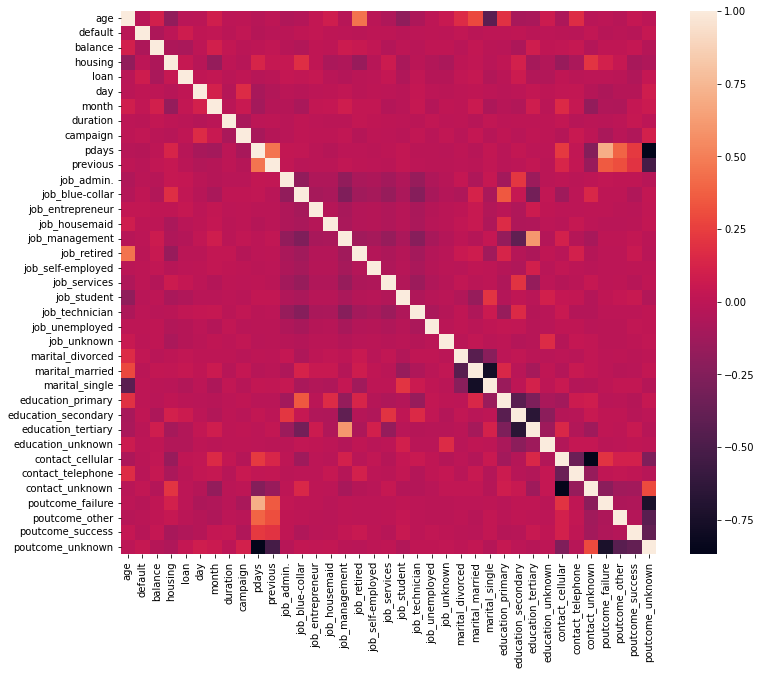

In [57]:
plt.figure(figsize=(12,10))
### START CODE HERE ###
# Compute the Pearson Correlation of each feature in the training df
cor =  df_train.corr(method='pearson')
### END CODE HERE ###
# Plot the correlations
sns.heatmap(cor)
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

## Feature Selection

### Exercise: Drop feature columns which have a high absolute Pearson Correlation

Let's choose to drop the higher-indexed of the two correlated columns, i.e. the one that appears farther to the right in the df

In [58]:
cor.shape

(37, 37)

In [59]:
### START CODE HERE ### 
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = np.full((cor.shape[0],), True, dtype=bool)
print("Column Entries Vector:\n", keep_columns)
# Loop over all columns
for i in range(cor.shape[0]):
    # Loop over all columns to the right of the current one
    for j in range(i+1, cor.shape[0]):
        # If the absolute correlation between the current two columns is greater than or equal to 0.8...
        if (np.abs(cor.iloc[i,j])) >= 0.8:
            # If we haven't already told the keep_columns list to drop column j...
            if keep_columns[j]:
                # Drop column j
                keep_columns[j] = False
# Extract the columns to keep from the training df
selected_columns = df_train.columns[keep_columns]
print("Selected Columns:\n", selected_columns)

# Make a new df with the columns we've decided to keep from the training df
df_out = df_train[selected_columns]
### END CODE HERE ###
print('The following columns are present in the new df:')
print(selected_columns)
print(f'The old df had {df_train.shape[1]} features. The new df has {df_out.shape[1]} features.')
df_train.head()

Column Entries Vector:
 [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
Selected Columns:
 Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'poutcome_failure', 'poutcome_other', 'poutcome_success'],
      dtype='object')
The following columns are present in the new df:
Index(['age', 'default', 'balance', '

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,...,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,5,261,1,-1,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,-1,...,1,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,5,76,1,-1,...,1,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,-1,...,0,0,1,0,0,1,0,0,0,1
4,33,0,1,0,0,5,5,198,1,-1,...,0,0,1,0,0,1,0,0,0,1


### Feature Selection on p-value (statistical significance to Y value)

In [60]:
selected_columns = selected_columns[0:]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.01
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns = backwardElimination(df_out.values, y, SL, selected_columns)

In [61]:
print('The following columns remain based on p-value selection:')
print(selected_columns)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(f'After selection by Pearson Correlation, we had {df_out.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')

The following columns remain based on p-value selection:
Index(['balance', 'housing', 'loan', 'month', 'duration', 'campaign',
       'job_admin.', 'job_retired', 'job_student', 'marital_married',
       'education_primary', 'education_secondary', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')
After selection by Pearson Correlation, we had 35 features.
After selection by p-value, we have 17 features.


### Visualize the distributions of the selected features

Ignore the deprecation warnings

/Users/christianwelling/Fourthbrain/Fourthbrain/fourthbrain_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/christianwelling/Fourthbrain/Fourthbrain/fourthbrain_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/christianwelling/Fourthbrain/Fourthbrain/fourthbrain_venv/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be rem

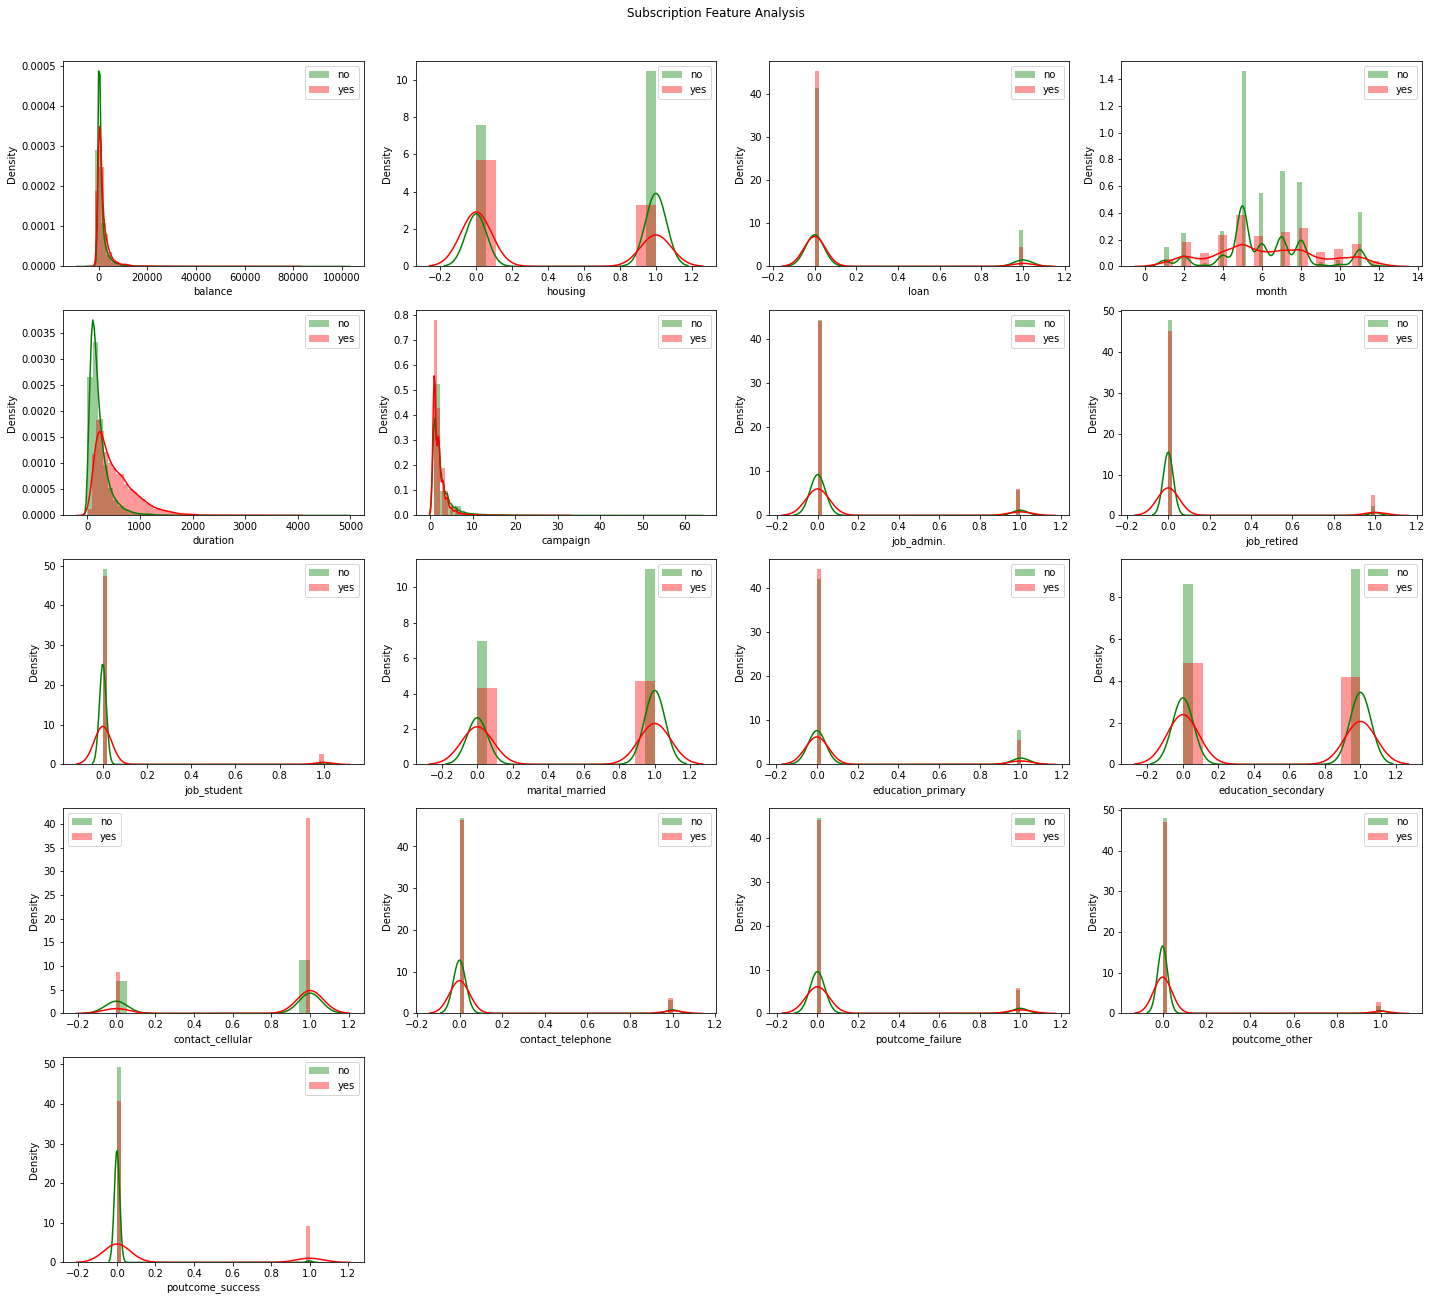

In [65]:
# Visualize the selected features
fig = plt.figure(figsize = (20, 25));
j = 0
for i in data_red.columns:
    plt.subplot(7, 4, j+1);
    j += 1
    sns.distplot(data_red[i][y==0], color='g', label = 'no');
    sns.distplot(data_red[i][y==1], color='r', label = 'yes');
    plt.legend(loc='best');
fig.suptitle('Subscription Feature Analysis');
fig.tight_layout();
fig.subplots_adjust(top=0.95);
plt.show();

### Exercise: Cross-validated LASSO feature importance

In [67]:
### START CODE HERE ###
# Instantiate the cross-validated LASSO regressor
reg = LassoCV()
# Train the regressor on the reduced df
%time reg.fit(data_red, y)
### END CODE HERE ###
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(data_red, y))
coef = pd.Series(reg.coef_, index = data_red.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

CPU times: user 751 ms, sys: 161 ms, total: 912 ms
Wall time: 1.28 s
Best alpha using built-in LassoCV: 0.059450
Best score using built-in LassoCV: 0.157613
Lasso picked 2 features and eliminated the other 15 features


### Visualize the LASSO feature importances

Text(0.5, 1.0, 'Feature importance using Lasso Model')

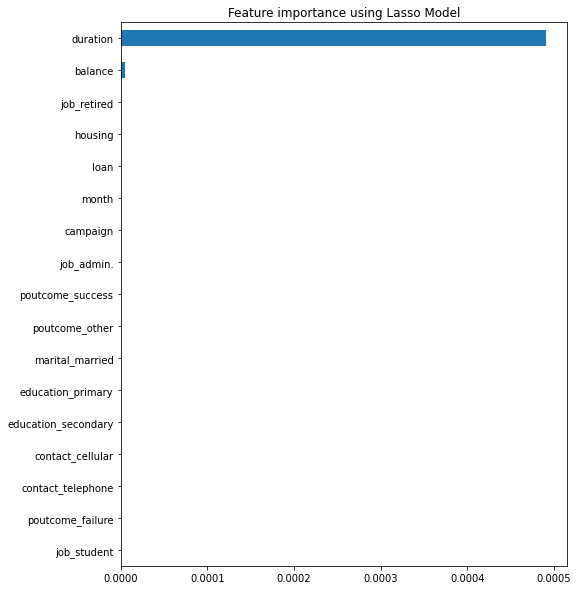

In [68]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
#pdays is the only other feature here

### Print summary statistics for the reduced df

In [69]:
data_red.describe()

,balance,housing,loan,month,duration,campaign,job_admin.,job_retired,job_student,marital_married,education_primary,education_secondary,contact_cellular,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,0.555838,0.160226,6.144655,258.163080,2.763841,0.114375,0.050076,0.020747,0.601933,0.151534,0.513194,0.647741,0.064276,0.108403,0.040698,0.033421
std,3044.765829,0.496878,0.366820,2.408034,257.527812,3.098021,0.318269,0.218105,0.142538,0.489505,0.358572,0.499831,0.477680,0.245247,0.310892,0.197592,0.179735
min,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72.000000,0.000000,0.000000,5.000000,103.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,448.000000,1.000000,0.000000,6.000000,180.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1428.000000,1.000000,0.000000,8.000000,319.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,102127.000000,1.000000,1.000000,12.000000,4918.000000,63.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Random Forest Classification

### First, import some convenience functions and perform a 70-30 train-test split split on the (reduced) training data

In [70]:
from sklearn.model_selection import cross_val_score
from numpy import mean
x_train, x_test, y_train, y_test = train_test_split(data_red.values, y.values, test_size = 0.3)

### Exercise: Default Random Forest Classifier, without balancing

In [72]:
### START CODE HERE ###
from sklearn.metrics import accuracy_score as accuracy_fn # to verify my calculation of accuracy
# Instantiate the classifier
# Set the max depth to 10 and the random state to 0
clf = RandomForestClassifier()
# Train the classifier
clf.fit(x_train, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
acc = accuracy_fn(y_test, prediction)
accuracy = np.trace(cm)/len(y_test)
### END CODE HERE ###
print(f"Accuracy [Manually Computed] = {accuracy}")
print(f"Accuracy [Sklearn.metrics] = {acc}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy [Manually Computed] = 0.8964907107048068
Accuracy [Sklearn.metrics] = 0.8964907107048068
Mean Recall = 0.349
Mean F1 Score = 0.445
[[11532   397]
 [ 1007   628]]


### Exercise: Random Forest Classifier with weight balancing

The target class is highly imbalanced; recall from earlier that only about 11.7% of loan applicants in this dataset are approved. One way around this is to add weight balancing to the classifier.

This exercise is otherwise a repeat of the previous one.

In [73]:
### START CODE HERE ###
# Instantiate the classifier
# Set the max depth to 10, the random state to 0, and the class_weight to 'balanced'
clf = RandomForestClassifier(max_depth=10, random_state=0, class_weight='balanced')
# Train the classifier
clf.fit(x_train, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.trace(cm)/len(y_test)
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.8405337658507814
Mean Recall = 0.767
Mean F1 Score = 0.548
[[10058  1871]
 [  292  1343]]


It seems that while the accuracy of the unbalanced classifier had a higher accuracy, the F1 score and recall for the balanced classifier showed to be more desirable.